In [461]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from scipy.stats import uniform
from scipy.special import comb
from scipy.stats import norm
from scipy.integrate import quad

import cv2
from sklearn.datasets import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

$\textbf{1.}$ What makes a good feature? Explain with illustrative figures and rationale.

##### Answer:

A good feature can discriminate between different classes. For example, if we want to design a system that can differentiate between children and adults, height and weight would be good features since there is a clear distinction in height and weight between children and adults. However, if we want to distinguish them based on their hair and eye color, it would be impossible since there is no clear distintion between adults and childs in those features. Figure A and B illustrate the examples of good and features. We see in the figure that the two groups are linearly seperable using height and weight as features. However, we observe overlaps and non-separability between the two groups when using hair and eye color as features. 

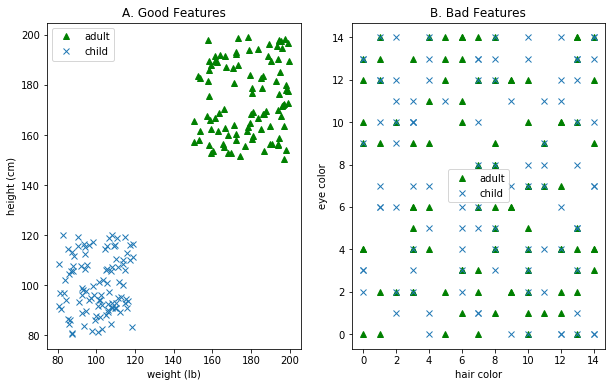

In [128]:
adult = np.random.uniform(150, 200, (100,2))
child = np.random.uniform(80, 120, (100,2))

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('A. Good Features')
plt.plot(adult[:, 0], adult[:, 1], 'g^', label='adult')
plt.plot(child[:, 0], child[:, 1], 'x', label='child')
plt.xlabel('weight (lb)')
plt.ylabel('height (cm)')
plt.legend()

adult = np.random.randint(0, 15, (100,2))
child = np.random.randint(0, 15, (100,2))

plt.subplot(122)
plt.title('B. Bad Features')
plt.plot(adult[:, 0], adult[:, 1], 'g^', label='adult')
plt.plot(child[:, 0], child[:, 1], 'x', label='child')
plt.xlabel('hair color')
plt.ylabel('eye color')
plt.legend()

$\textbf{2.}$ Write the formula for covariance matrix and explain the meaning of diagonal and off-diagonal terms. 

If X is a r.v and $\mu$ is its' mean then,

$COV (X) = E[(X - \mu) ^ T (X - \mu)] =
\begin{vmatrix}
E[(x_1 - \mu_1) (x_1 - \mu_1) ] & ....... & E[(x_1 - \mu_1)(x_n - \mu_n)]\\
. & E[(x_2 - \mu_2)(x_2 - \mu_2)] \, ....... & . \\
. & ....... & . \\
. & ....... & . \\
. & ....... & . \\
E[(x_n - \mu_n)(x_1 - \mu_1)] & ....... & E[(x_n - \mu_n)(x_n - \mu_n)] \\
\end{vmatrix} 
= \begin{vmatrix}
\sigma_1^2 & ....... & c_{1n} \\
c_{21} & \sigma_2^2..... & . \\
. & ....... & . \\
. & ....... & . \\
c_{n1} & ....... & \sigma_n^2 \\
\end{vmatrix}
$

The diagonal terms $\sigma_i ^ 2, \, for \, i=1,2,3,.......,n$ are the variance of variable $x_i$. And the off-diagonal terms $c_{ij}$ are the covariance between variable $x_i$ and $x_j$.

------------------------------------------------------------------------------------------------------------------
$\textbf{3.}$ What are the important properties of principal components? What is the interpretation of the first principal component? Draw some examples of data distribution in which PCA may not be useful.

##### Answer:
Properties of principal components (PC):

1) Linear combination of the vectors in the original data, the weights vector in the PC is the eigen vector which best represents the data in the least square sense. 

2) PCs are orthogonal to each other.

3) Retention of variation in PCs decreases as we move down the order.

----------------------------------------------------------------------------------------------------------------------------

PCs represent the directions of the data that explain the maximal amount of variance. PCs are constructed in such that the first PC accounts for the largest possible variance in the data set. This component is the line in the n dimensional vector space that goes through the mean of the data and is the best approximation of data in least square sense. The projection (co-ordinates) of the observations onto this line is know as the scores. The first PC also represent the direction of the maximum variation in dataset.

To further illustrate the power of first PC, I show an example using a sample image. I apply PCA on the sample image and reconstruct the image using 1st, 2nd, 3rd and 4th PCs. I compute the mean squared error (MSE) for each of the reconstructed image and it is clear that the 1st component retains the highest variance as the MSE is lowest. 

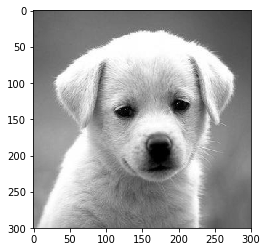

In [405]:
X = cv2.imread('einstein.jpg', cv2.IMREAD_GRAYSCALE)
X = cv2.resize(X, (300, 300))
plt.imshow(X, cmap='gray')

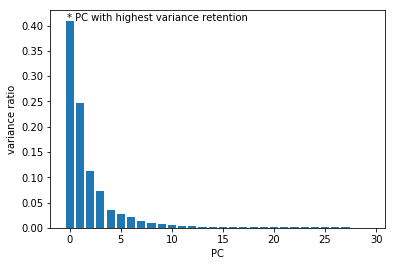

In [402]:
pca = PCA()
pca.fit(X)
    
plt.bar(range(30), pca.explained_variance_ratio_[:30])
# # plt.xticks([0, 16, 32, 48, 63], [1, 16, 32, 48, 64])
plt.xlabel('PC')
plt.ylabel('variance ratio')
plt.text(-0.3, 0.41, '* PC with highest variance retention')
plt.show()

As can be seen that the 1st component retains the highest variance (denoted by *).

Now lets compare the MSE of the reconstructed image using 1st, 2nd, 3rd and 4th PCs.

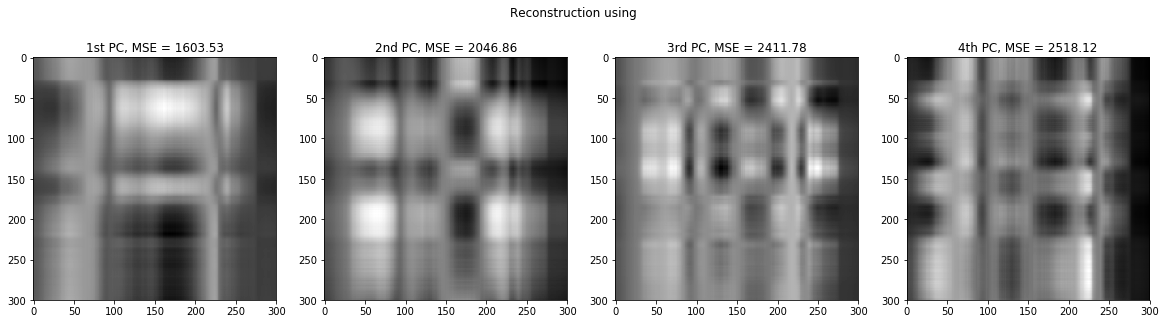

In [410]:
X_new = pca.transform(X)

rs_im = []
for i in range(4):
    component = pca.components_[i]
    component = component.reshape((1,-1))
    proj = X_new[:,i].reshape((-1,1))
    rs = np.dot(proj, component) + pca.mean_
    rs_im.append(rs)


fig, axes = plt.subplots(ncols=4, figsize=(20,5))
c_i = ['1st', '2nd', '3rd', '4th']
for i,a in enumerate(rs_im):

    loss = np.mean((X - a)**2)
    axes[i].set_title('{} PC, MSE = {:.2f}'.format(c_i[i], loss))
    axes[i].imshow(a, cmap='gray')

fig.suptitle('Reconstruction using')
plt.show()

-----------------------------------------------------------------------------------------------------------------

PCA works in the assumption that the features in the data are linearly correlated. Therefore, PCA is not effective when the features in the data contains non-linear relationship. In these cases PCA could fail to recover data from the projected variables. I give an example using a non-linear dataset.

Text(0,0.5,'x2')

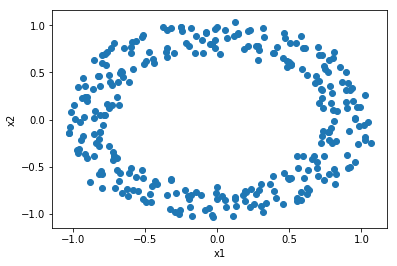

In [478]:
X, y = make_circles(300, noise=0.05)
# X = X + np.random.random_sample((100,2))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')

This is a non-linearly distributed data as evident by its circular shape. Now we apply PCA on this data and see if primary and secondary component can restore the data close to its original form.

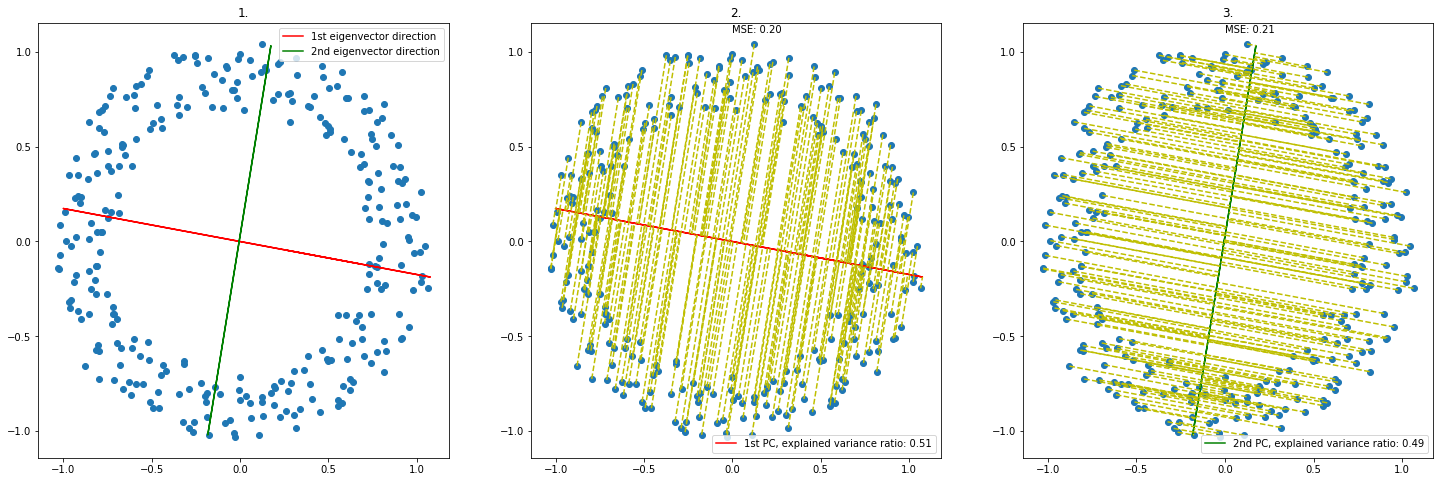

In [494]:
pca = PCA(2)
proj = pca.fit_transform(X)
first_comp = pca.components_[0].reshape((1,-1))
second_comp = pca.components_[1].reshape((1,-1))

first_proj = proj[:,0].reshape((-1,1))
second_proj = proj[:,1].reshape((-1,1))

recon_first = np.dot(first_proj, first_comp) + pca.mean_
recon_second = np.dot(second_proj, second_comp) + pca.mean_


plt.figure(figsize=(25,8))
plt.subplot(131)
plt.title('1.')
plt.scatter(X[:,0], X[:,1])

plt.plot(recon_first[:,0], recon_first[:,1], c='r', label='1st eigenvector direction')
plt.plot(recon_second[:,0], recon_second[:,1], c='g', label='2nd eigenvector direction')

plt.legend()

plt.subplot(132)
plt.title('2.')
plt.scatter(X[:,0], X[:,1])

plt.plot(recon_first[:,0], recon_first[:,1], c='r', 
         label='1st PC, explained variance ratio: {:.2f}'.format(pca.explained_variance_ratio_[0]))

for i,p in enumerate(recon_first):
    x = [X[i,0], p[0]]
    y = [X[i,1], p[1]]
    plt.plot(x,y, '--', c='y')
    
plt.text(0, 1.1, 'MSE: {:.2f}'.format(np.mean((X-recon_first)**2)))
plt.legend(loc='lower right')

plt.subplot(133)
plt.title('3.')
plt.scatter(X[:,0], X[:,1])

plt.plot(recon_second[:,0], recon_second[:,1], c='g', 
         label='2nd PC, explained variance ratio: {:.2f}'.format(pca.explained_variance_ratio_[1]))

for i,p in enumerate(recon_second):
    x = [X[i,0], p[0]]
    y = [X[i,1], p[1]]
    plt.plot(x,y, '--', c='y')
    
plt.text(0, 1.1, 'MSE: {:.2f}'.format(np.mean((X-recon_second)**2)))
plt.legend(loc='lower right')

plt.show()

Figure 1 shows the direction of the 1st and 2nd PC. The data points are very far from the projection of 1st PC (fig 2) and the 2nd PC (fig 3). The MSE for the projected data using 1st and 2nd components are also high (0.2, 0.21 respectively) and close to each other even though they are the only components possible for this data. So it is clear that PCA does not work well in a non-linear dataset, especially if we want to reduce dimension. 

---------------------------------------------------------------------------------------------------------

$\textbf{4.}$ Define within-class scatter and between-class scatter matrices. Explain what types of projections are obtained using Linear Discrimination Analysis (LDA).

##### Answer:

Within class scatter matrix: 

$S_w = \sum_{i=1}^c \sum_{x_k \in {\omega_i}} (x_k - \mu_i)(x_k - \mu_i)^T$

Here $x_k$ is the samples belonging to class $\omega_i$, for $i=1, 2, ....., c$ and $\mu_i$ is the mean vector of samples in class $\omega_i$. In within scatter matrix, we are essentially computing the covariance matrix of class $\omega_i$. The final covariance matrix captures the variation of samples within each class.

Between class scatter matrix: 

$S_B = \sum_{i=1}^c (\mu_i - \mu)(\mu_i- \mu)^T$

$\mu_i$ is the mean of samples belonging to class $\omega_i$ and $\mu$ is the mean of all samples. $S_B$ is the covariance matrix that captures the variation between samples in different classes.

------------------------------------------------------------------

LDA projects data into lower dimensions in a class discrimintaive fashion. It is a supervised method,that  essentially tries to preserve the variation in between different classes while reducing dimension. LDA does so by reducing the variance within each class while increasing variance between different classes.  

---------------------------------------------------------------------------------------------------------

$\textbf{5.}$ Which Gaussian distribution contains more information, the one with large variance or the one with small variance? Justify your answer.

##### Answer: 

A Gaussian distribution with high variance contains more information. High variance implies that the data is well spread from the mean and therefore there is more information. A well spread Gaussian distribution will have useful information till $\pm 3\sigma$, however, a low variance Gaussian distribution will have most values close to the mean which implies that there is not much information.

------------------------------------------------------------------------------------------------------------------
$\textbf{6}$. Let’s say your football team is playing a series of 5 games against your opponent. Whoever wins more games (out of 5) wins the title. Let us say, your team might is more skilled and has 75% chances of winning. So, there is a 25% chance of losing it. What is the probability of your team winning the series? Is it 75% or is it something else?

#####  Answer:

My team has to win 3, 4 or 5 games in order to win the series. The results of the game are independent of each other, so the probabilty my team winning the series could be modeled using a bionomial distribution where,

the number of games, $n = 5$, 

the minimum number of wins required, $k=[3,4,5]$, 

the probability of winning a game, $p=0.75$,

So, the probabiltiy of my team winning the series, 

$Pr(k | n,p) = Pr(k = 3 | n=5,p=0.75) + Pr(k = 4 | n=5,p=0.75) + Pr(k = 5 | n=5,p=0.75)$

We know, $Pr(k | n,p) = {n \choose k} p^k (1-p)^{n-k}$

In [2]:
n = 5
K = [3,4,5]
p=0.75
Pr = []
for i,k in enumerate(K):
    Pr.append(comb(n, k) * p ** k * (1-p) ** (n-k))
    
print('The probabiltiy of my team winning the series: {}'.format(np.sum(Pr)))

The probabiltiy of my team winning the series: 0.896484375


------------------------------------------------------------------------------------------------------------------
$\textbf{7.}$ Suppose two numbers are chosen at random from the range [0,1] according to a uniform distribution. Suppose p is the probability that the ratio of the first number to the second number “rounds down” (floor) to an even number. Where the probability of the ratios will fall?

a) p < 0.3; 

b) 0.3 ≤ p <0.4; 

c) 0.4 ≤ p <0.5; 

d) 0.5 ≤ p <0.6; 

e) 0.6 ≤ p <0.7; 

f) 0.7 ≤ p


In [54]:
def prob_even(n):
    ratio = []
    count = 0
    for i in range(n):
        a,b = np.random.uniform(size=2)
        if np.floor(a/b) % 2 == 0:
            count += 1
            
    return count/n
        
N = np.linspace(10, 1000000, 1000, dtype=np.int)
probs = []


for i in tqdm(N):
    probs.append(prob_even(n))


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:02<00:00,  2.37it/s]


The probability of the ratio to be even is: e) 0.6 ≤ p <0.7


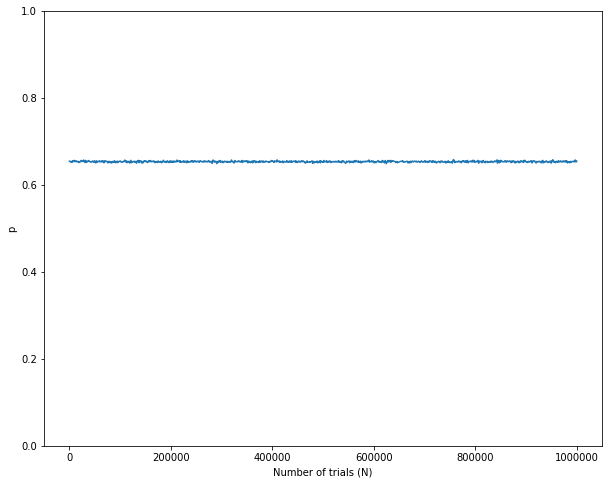

In [57]:
plt.figure(figsize=(10,8))
plt.plot(N, probs)
plt.ylim(0,1)
plt.xlabel('Number of trials (N)')
plt.ylabel('p')

print('The probability of the ratio to be even is: e) 0.6 ≤ p <0.7')

------------------------------------------------------------------------------------------------------------------

$\textbf{8.}$ Let us assume that the test scores an entrance exam fits a normal distribution where the mean test score is 76, and the standard deviation is 23.7. Calculate the percentage of students scoring 80 or more in the exam?

##### Answer:

Let $X$ be the r.v of the test scores,

then p.d.f of $X$, $f(X) = \frac{1}{\sigma \sqrt{2\pi}} e^ {-\frac{(X-\mu)^2}{\sigma^2}}$

$\mu = 76, \sigma = 23.7$,

So, $Pr(X \geq 80) = \int_{80} ^ {\infty} \frac{1}{\sigma \sqrt{2\pi}} e^ {-\frac{(X-\mu)^2}{\sigma^2}}dX$

In [52]:
def norm_pdf(x, mu, sig):
    pdf = (1/np.sqrt(2 * np.pi * sig ** 2)) * np.exp(-0.5 * ((x - mu)/sig)**2 )
    return pdf

result = quad(lambda x: norm_pdf(x, 76, 23.7), 80, np.inf)

print('Pr(X >= 80) = {0:.4f}'.format(result[0]))

Pr(X >= 80) = 0.4330


------------------------------------------------------------------------------------------------------------------
$\textbf{9.}$ Suppose that A is an event such that Pr(A) = 0 and that B is any other event. Prove that A and B are independent events. 

#####  Answer:

For A and B to be independent events, $Pr \, (A \cap B) = Pr \, (A) \, Pr \, (B)$

Since $Pr \, (A) = 0$

=> $Pr \, (A) \, Pr \, (B) = 0$

Now, $Pr \, (A \, | \, B) = \frac{Pr \, (A \cap B)}{Pr \, (B)}$  (rule of cond. probability)

=> $Pr \, (A \cap B) = Pr \, (A \, | \, B) \, Pr \, (B)$

From Bayes rule, $Pr \, (A \, | \, B) = \frac{Pr \, (B \, | \, A) \, Pr \, (A)}{Pr \, (B)}$

= $\frac{Pr \, (B \, | \, A) \,. \, 0}{Pr \, (B)}$

=> $Pr \, (A \, | \, B) = 0$

So, $Pr \, (A \cap B) = 0 \, .  Pr \, (B) = 0$

=> $Pr \, (A \cap B) = Pr \, (A) \, Pr \, (B)$

Thus, A and B are independent events. (proved)

------------------------------------------------------------------------------------------------------------------
$\textbf{10.}$ Suppose that the p.d.f. of a random variable X is:

$f(x) = c x^2,$ for $1 \leq x \leq 2$; Otherwise $0$ 

a) What is the value of constant c?

b) Sketch the p.d.f. - Pr(X > 3/2) =? 

c,d) Suppose that the random variable X has a uniform distribution on interval [0, 1]. Random variable Y has a uniform distribution on the interval [4, 10]. X and Y are independent. Suppose a rectangle is to be constructed for which the lengths of two adjacent sides are X and Y. So, what is the expected value of the area of this rectangle? 

e) Suppose that X is a random variable. If E(X) = μ, Var(X) = σ^2 , then what is the value of E[X(X − 1)] =? 

#####  Answer:

a) Since $f(x)$ is the p.d.f, $\int f(x) = 1$. Also, $f(x) > 0$ only when $1 \leq x \leq 2$,

So, $\int_1 ^ 2 f(x) = 1$

=> $\int_1 ^ 2 c x^2 = 1$

=> $c[\frac{x^3}{3}]_1^2 = 1$

=> $c . \frac{7}{3} = 1$

=> $c = \frac{3}{7}$

b) p.d.f sketch for Pr(X > 3/2)

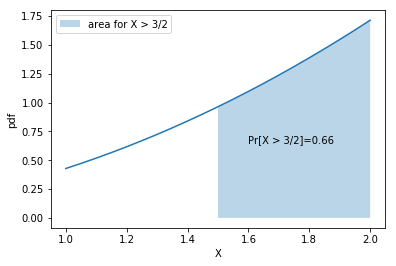

In [3]:
X = np.arange(1, 2, 0.0001)

pdf = (3/7) * X**2
plt.plot(X, pdf)

plt.fill_between(X[X > 1.5], pdf[X > 1.5], alpha=0.3, label='area for X > 3/2')

plt.text(1.6, 0.65, 'Pr[X > 3/2]=0.66')

plt.ylabel('pdf')
plt.xlabel('X')
plt.legend()
plt.show()

c,d) Since X and Y are independent, the area of the rectangle would be = $E[X] \, E[Y]$

=> $E[X] = \frac{0 + 1}{2} = 0.5$

=> $E[Y] = \frac{4 + 10}{2} = 7$

So, the area = $7 \times 0.5 = 3.5$

e) Let $f_x(X)$ be the p.d.f of $X$

Then, $Var(X) = E[(X - E[X])^2] = \int_{-\infty}^{+\infty} (X-\mu)^2 f_x(X)dx$

= $\int_{-\infty}^{+\infty}(X^2 - 2 \mu X + \mu^2)f_x(X)dx$ 

= $\int_{-\infty}^{+\infty} X^2f_x(X)dx - 2 \mu \int_{-\infty}^{+\infty} X f_x(X)dx + \mu^2 \int_{-\infty}^{+\infty} f_x(X)dx$

Since, $E[X] = \mu = \int_{-\infty}^{+\infty} Xf_x(X)dx$ and $\int_{-\infty}^{+\infty} f_x(X)dx = 1$,

Then, $Var(X) = E[X^2] - 2 \mu \times \mu + \mu^2$

=> $\sigma^2 = E[X^2] - \mu^2$   (Given $Var(X) = \sigma^2$)

=> $E[X^2] = \sigma^2 + \mu^2$

Now, $E[X(X-1)] = E[X^2 - X] = E[X^2] - E[X]$

= $\sigma^2 + \mu^2 - \mu$ (Ans)

------------------------------------------------------------------------------------------------------------------
$\textbf{11.}$ Imagine there are three boxes labeled A, B and C. Two of them are empty, and one contains a prize. Unfortunately, they are all closed and you don’t know where the prize is. You first pick a box at random, say box A. However, before you open it, box B is opened by someone, and you see that it is empty. You have to make your final choice as to what box to open: A or C. 
Question: For each of the cases below, answer what box would you open so as to maximize the chances that the box you open contains the prize? Support your arguments by computing the probability of the prize being in box A and C. Here are the three strategies according to which box B was chosen to be opened: 

a)	In this strategy if you first pick a box (in this case A) with a prize, then one of the other two boxes is opened at random. On the other hand, if you first choose a box that has no prize, then the empty box that you did not pick is chosen.

b)	In this strategy it is just one of the two boxes that you did not pick is chosen at random (in this case it is a random choice between B and C).

c)	In this strategy one of empty boxes is chosen at random (independently of whether you initially pick a box with a prize or not).


##### Answer:

Let $prize_A, \, prize_B,  \, prize_C$ be the events where the prizes are in box A, B, and C respectively.

Initially the prize could be in any of these boxes, therefore, $prize_A = prize_B = prize_C = \frac{1}{3}$

And let $A, \, B, \, C$ be the events of opening of empty box A, B and C after the initial pick.

a) Let say I initially pick box A and box B was opened and shown to be empty. Now if box A contains the prize,

=> $Pr (prize_A | B) = \frac{Pr (B | prize_A) \, Pr (prize_A)}{Pr (B | prize_A) \, Pr (prize_A) + Pr (B | prize_B) \, Pr (prize_B) + Pr (B | prize_C) \, Pr (prize_C)}$  (Bayes rule)

$Pr (B | prize_A)$: the probability of box B is opened and empty given that box A has the prize = 0.5, because if box A contains the prize, the choice between the other two boxes is random.

$Pr (B | prize_C)$: the probability of box B is opened and empty given that box C has the prize = 1, because the box you choose cannot be opened.

$Pr (B | prize_B)$: the probability of box B is opened and empty given that box B has the prize = 0, because the box with the prize will never be opened.

=> $Pr (prize_A | B) = \frac{\frac{1}{2} . \frac{1}{3}}{\frac{1}{2} . \frac{1}{3} + 0 . \frac{1}{3} + 1 . \frac{1}{3}} = \frac{1}{3}$

Now if I picked box A initially and it does not contain the prize but box C contains the prize, then,

=> $Pr (prize_C | B) = \frac{Pr (B | prize_C) \, Pr (prize_C)}{Pr (B | prize_A) \, Pr (prize_A) + Pr (B | prize_B) \, Pr (prize_B) + Pr (B | prize_C) \, Pr (prize_C)}$

=> $Pr (prize_C | B) = \frac{1 . \frac{1}{3}}{\frac{1}{2} . \frac{1}{3} + 0 . \frac{1}{3} + 1 . \frac{1}{3}} = \frac{2}{3}$

Since $Pr (prize_C | B) > Pr (prize_A | B)$, I will chose to open box C.

b) Let say I initially picked box A and the probability of choosing box B and C is 0.5, then it is highly probable that the box A contains the prize. Because,

=> $Pr (prize_A | B) = \frac{1}{3}$

and similarly,

=> $Pr (prize_A | C) = \frac{1}{3}$

So, the probability of the prize being in box A = $Pr (prize_A | B) + Pr (prize_A | C) = \frac{2}{3}$

Therefore, I will stay with my decision to open box A.

c) In this strategy, the initial box I choose (A) could be opened if it is empty. 

Therefore, $Pr (prize_A | A) = 0$ but if the initial box I choose (A) contains the prize then the probabilty of my win with staying on the initial decision is $\frac{2}{3}$ (as shown in problem b).

However, if I pick and observed box A is empty, then

=> $Pr (prize_B | A) = Pr (prize_C | A) = 0.5$ because $Pr (prize_A | A) = 0$.

Similarly, $Pr (prize_B | C) = Pr (prize_A | C) = 0.5$ and $Pr (prize_C | B) = Pr (prize_A | B) = 0.5$.

This is a stalemate. So I have to pick randomly.